In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [101]:
# Cleaning the dataset
ath = pd.read_csv('athlete_events.csv')
ath = ath.drop(columns=["ID", "Games"])
ath = ath[ath['Medal'].notna()]
ath.reset_index(inplace=True)
ath = ath.drop(columns=["index"])
ath = ath.convert_dtypes()
ath.columns = ath.columns.str.lower()
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39783 entries, 0 to 39782
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    39783 non-null  string 
 1   sex     39783 non-null  string 
 2   age     39051 non-null  Int64  
 3   height  31072 non-null  Int64  
 4   weight  30456 non-null  Float64
 5   team    39783 non-null  string 
 6   noc     39783 non-null  string 
 7   year    39783 non-null  Int64  
 8   season  39783 non-null  string 
 9   city    39783 non-null  string 
 10  sport   39783 non-null  string 
 11  event   39783 non-null  string 
 12  medal   39783 non-null  string 
dtypes: Float64(1), Int64(3), string(9)
memory usage: 4.1 MB


In [102]:
ath.replace({np.nan: None}, inplace = True)
# ath.head(10)

# Plot 1

In [103]:
ath.head()

,name,sex,age,height,weight,team,noc,year,season,city,sport,event,medal
0,Edgar Lindenau Aabye,M,34,None,None,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30,None,None,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30,None,None,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28,184,85.0,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28,175,64.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [104]:
df = ath.copy()

In [222]:
top10_countries_wins_most_medal = df["noc"].value_counts().iloc[:10].index
top10_countries_wins_most_medal
df1 = df.groupby(["noc", "medal"]).count().reset_index()
top10_countries_dfs = []
for country in df1["noc"].values:
    if country in top10_countries_wins_most_medal:
        top10_countries_dfs.append(df[df["noc"] == country ])
top10_countries_dfs = pd.concat(top10_countries_dfs, axis = 0)
grp_top10 = top10_countries_dfs.groupby(["noc", "medal"])["team"].count().reset_index()
sns.catplot(
    data=grp_top10, x="noc", y="team", hue="medal",
    kind="bar",alpha=.6, height=7, aspect=2
)

In [221]:
medal = df.groupby(["year", "noc", "season"])["medal"].count().reset_index()
medal = medal[medal["season"].str.contains("Summer") == True]
medal =  medal[medal["noc"].str.contains("USA")]
medal

,year,noc,season,medal
9,1896,USA,Summer,20
33,1900,USA,Summer,63
45,1904,USA,Summer,394
63,1906,USA,Summer,24
82,1908,USA,Summer,65
101,1912,USA,Summer,107
123,1920,USA,Summer,194
165,1924,USA,Summer,182
211,1928,USA,Summer,88
250,1932,USA,Summer,189


In [105]:
top10_countries_wins_most_medal = df["noc"].value_counts().iloc[:10].index
top10_countries_wins_most_medal

Index(['USA', 'URS', 'GER', 'GBR', 'FRA', 'ITA', 'SWE', 'CAN', 'AUS', 'RUS'], dtype='string')

In [106]:
df1 = df.groupby(["noc", "medal"]).count().reset_index()

In [107]:
top10_countries_dfs = []
for country in df1["noc"].values:
    if country in top10_countries_wins_most_medal:
        top10_countries_dfs.append(df[df["noc"] == country ])
# top10_countries_dfs

In [108]:
top10_countries_dfs = pd.concat(top10_countries_dfs, axis = 0)

In [109]:
grp_top10 = top10_countries_dfs.groupby(["noc", "medal"])["team"].count().reset_index()

In [110]:
sns.catplot(
    data=grp_top10, x="noc", y="team", hue="medal",
    kind="bar",alpha=.6, height=7, aspect=2
)

# Plot 2

In [111]:
# medal = df.groupby(["sex", "medal"])["name"].count()

In [112]:
# medal["F"].to_dict()

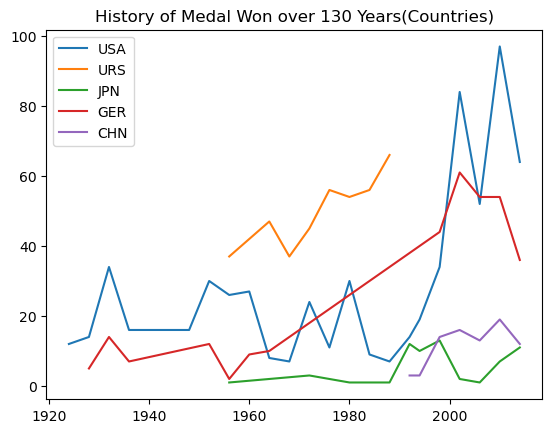

In [215]:
lists = ["USA", "URS", "JPN", "GER", "CHN"]
for list in lists: 
        medal = df.groupby(["year", "noc", "season"])["medal"].count().reset_index()
        medal = medal[medal["season"].str.contains("Summer") == False]
        medal =  medal[medal["noc"].str.contains(f"{list}")]
       
        plt.plot(medal["year"], medal["medal"], label =f"{list}")

plt.title("History of Medal Won over 130 Years(Countries)")
plt.legend()
plt.show()
      


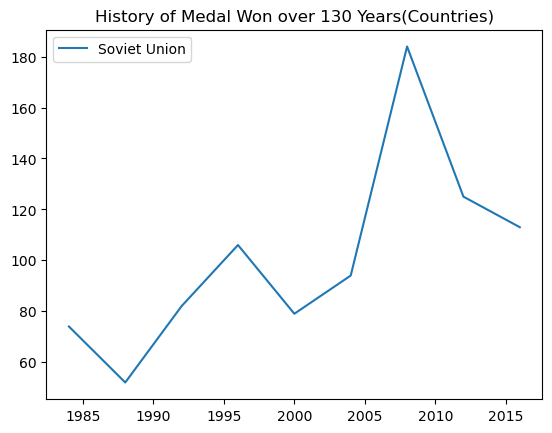

In [218]:

list = "CHN"
medal = df.groupby(["year", "noc", "season"])["medal"].count().reset_index()
medal = medal[medal["season"].str.contains("Winter") == False]
medal =  medal[medal["noc"].str.contains(f"{list}")]

plt.plot(medal["year"], medal["medal"], label= "Soviet Union")
plt.title("History of Medal Won over 130 Years(Countries)")
plt.legend()
plt.show()
      

In [214]:
grid=[x for x in range(130)]
lists = ["GER", "USA"]
for list in lists:
    medal = df.groupby(["year", "noc", "season"])["medal"].count().reset_index()
    medal = medal[medal["season"].str.contains("Winter") == False]
    medal =  medal[medal["noc"].str.contains(f"{list}")]
for gg, graph in enumerate(list):
    plt.plot(grid,graph,label='g'+str(gg))

plt.legend(loc=3,bbox_to_anchor=(1,0))
plt.show()

# plt.plot(medal["year"], medal["medal"], label= "Soviet Union")
# plt.title("History of Medal Won over 130 Years(Countries)")
# plt.legend()
# plt.show()
      

ValueError: Unrecognized character U in format string

In [ ]:
grouped_single = ath.groupby('noc').agg({'height': ['mean', 'min', 'max']})
grouped_single

In [ ]:
plt.plot(medal["year"], medal["medal"])
plt.plot(medal["year"], medal["medal"])
plt.show()

In [ ]:
most_medals = ath.groupby(["noc", "medal"])["team"].count().reset_index()
most_medals = most_medals.sort_values(by="team", ascending=False)
most_medals.index.name = "Country"
most_medals = most_medals.head(10)
most_medals

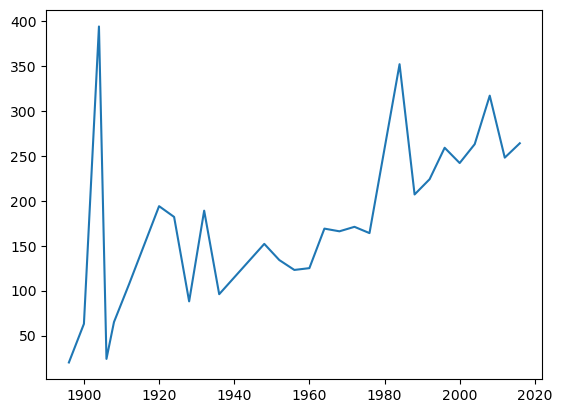

In [184]:
plt.plot(medal["year"], medal["medal"])
plt.show()

In [113]:
# palette_color = sns.color_palette('RdPu');
# plt.pie(medal["M"].values, labels=medal["M"].index, colors=palette_color, autopct='%.0f%%');

In [114]:
# fig, ax = plt.subplots(1,2, figsize = (16,10));

# for i ,df in enumerate([dfB_diognosis_neg,dfB_diognosis_pos]):
    
# #     ax.pie(diagnosis.values, labels = diagnosis.index)
#     # declaring exploding pie
#     explode = np.zeros(diagnosis.shape[0])
#     # define Seaborn color palette to use
#     palette_color = sns.color_palette('RdPu')
      
#     # plotting data on chart
#     ax[i].pie(diagnosis.values, labels=diagnosis.index, colors=palette_color,
#             explode=explode, autopct='%.0f%%')
#     ax[i].set_title(df["thrombosis"][0].capitalize(), weight = "bold", fontsize = 15)

In [115]:
# sns.scatterplot(
#     data = df,
#     x = "age",
#     y = "height",
#     hue = "medal"
# )

In [116]:
df

,name,sex,age,height,weight,team,noc,year,season,city,sport,event,medal
0,Edgar Lindenau Aabye,M,34,None,None,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30,None,None,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30,None,None,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28,184,85.0,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28,175,64.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39778,Galina Ivanovna Zybina (-Fyodorova),F,25,168,80.0,Soviet Union,URS,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
39779,Galina Ivanovna Zybina (-Fyodorova),F,33,168,80.0,Soviet Union,URS,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
39780,Bogusaw Zych,M,28,182,82.0,Poland,POL,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
39781,Olesya Nikolayevna Zykina,F,19,171,64.0,Russia,RUS,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [117]:
def plot_pie_sport(sport, palette_color ="Blues"):
#     sport= "Swimming"
    sport_name = df[df["sport"]== sport]["noc"].value_counts()[:10]
    plt.figure(figsize=(10,8))
    palette_color = sns.color_palette(palette_color)
    _, _, autotexts =  plt.pie(sport_name.values, labels = sport_name.index, colors= palette_color,  autopct='%.0f%%')
    # _, _, autotexts = pie(fbfrac,labels = fblabel,autopct='%1.1f%%',pctdistance=0.8,startangle=90,colors=fbcolor)
    # for autotext in autotexts:
    #     autotext.set_color('white')
    
    plt.title(f"Top 10 {sport} team, Percentage of Medals", weight = "bold", fontsize = 15)
    plt.show()

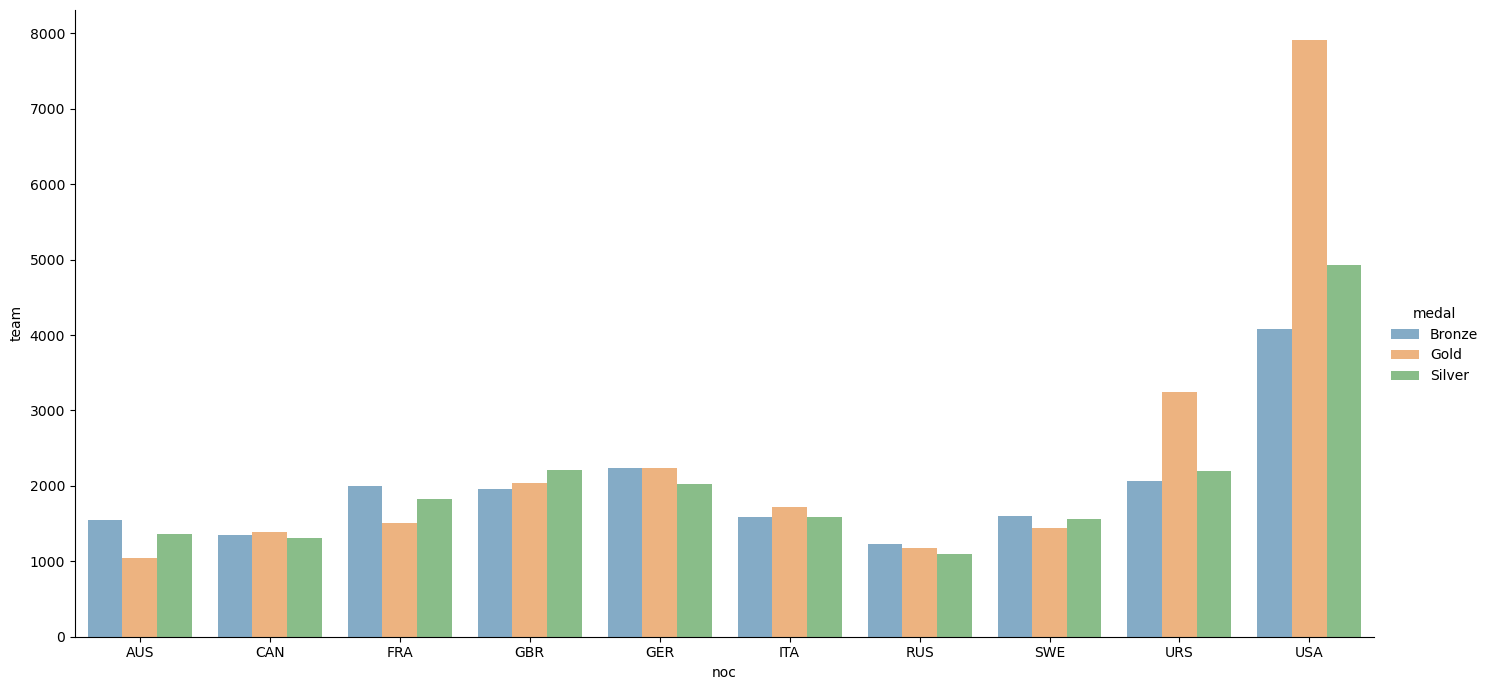

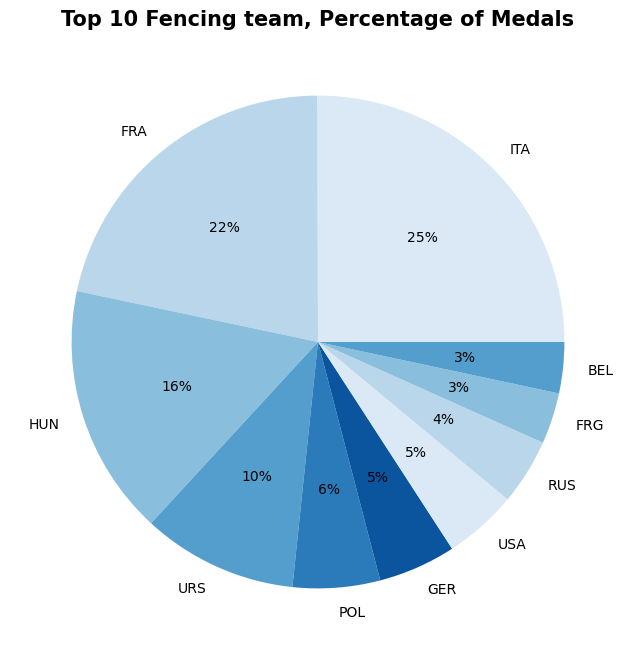

In [118]:
plot_pie_sport("Fencing")

In [119]:
df["sport"].nunique()

66

In [120]:
df["sport"].value_counts().iloc[:10]

Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Football      1571
Ice Hockey    1530
Hockey        1528
Wrestling     1296
Cycling       1263
Name: sport, dtype: Int64